Q1

256


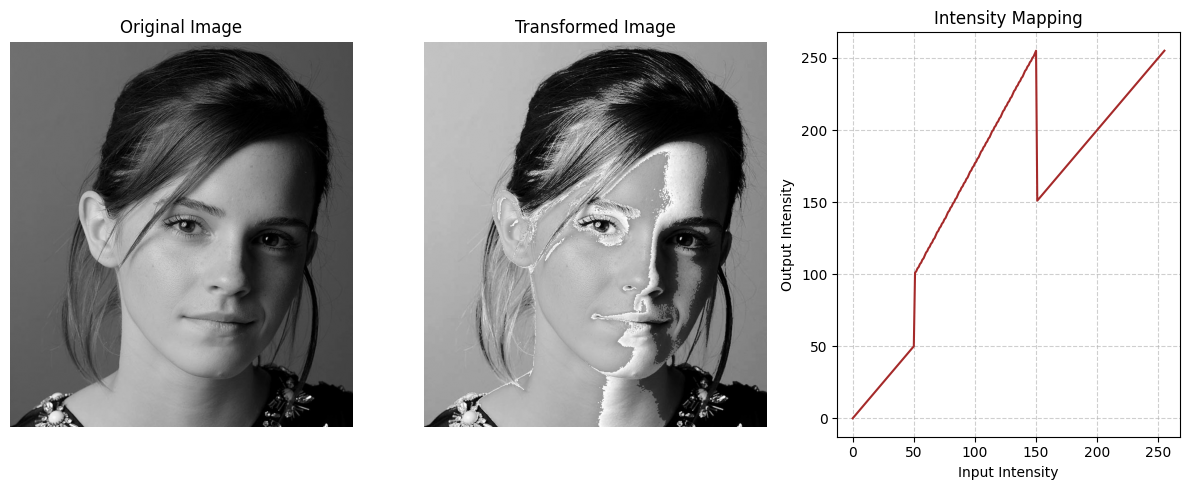

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,100),(150,255)])

t1 = np.linspace(0, c[0,0], c[0,0] +1).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, 255, 255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

img_org = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_org, transform)


# Plot results
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1,3,1)
plt.imshow(img_org, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Transformed image
plt.subplot(1,3,2)
plt.imshow(image_transformed, cmap="gray")
plt.title("Transformed Image")
plt.axis("off")

# Transformation curve
plt.subplot(1,3,3)
plt.plot(np.arange(256), transform, color="brown")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Mapping")

plt.tight_layout()
plt.show()

Q2



256


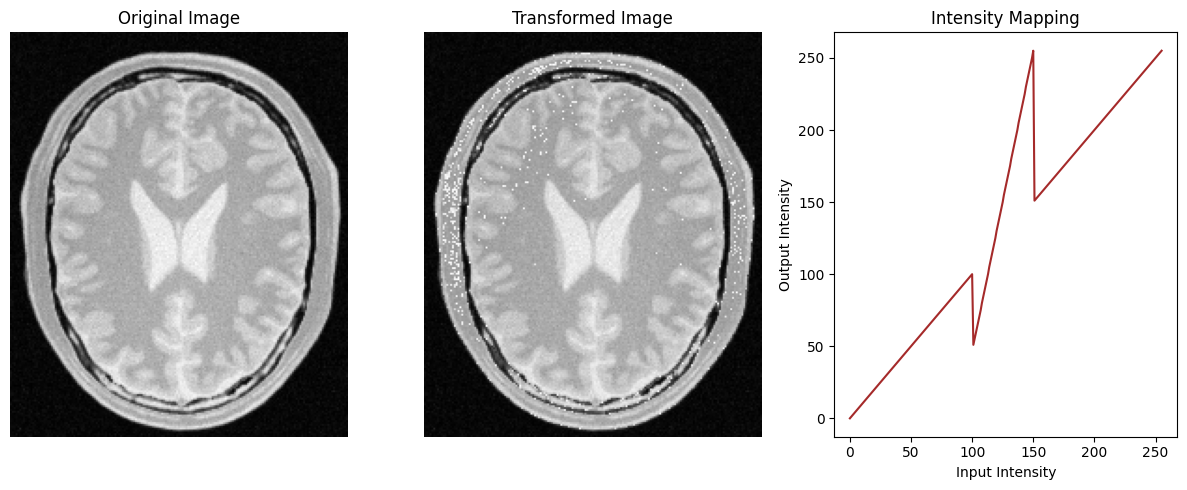

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50),(150,255)])

t1 = np.linspace(0, c[0,0], c[0,0] +1).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, 255, 255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2,t3), axis=0).astype('uint8')
# transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

img_org = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_org, transform)


# Plot results
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1,3,1)
plt.imshow(img_org, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Transformed image
plt.subplot(1,3,2)
plt.imshow(image_transformed, cmap="gray")
plt.title("Transformed Image")
plt.axis("off")

# Transformation curve
plt.subplot(1,3,3)
plt.plot(np.arange(256), transform, color="brown")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Mapping")

plt.tight_layout()
plt.show()

Q3

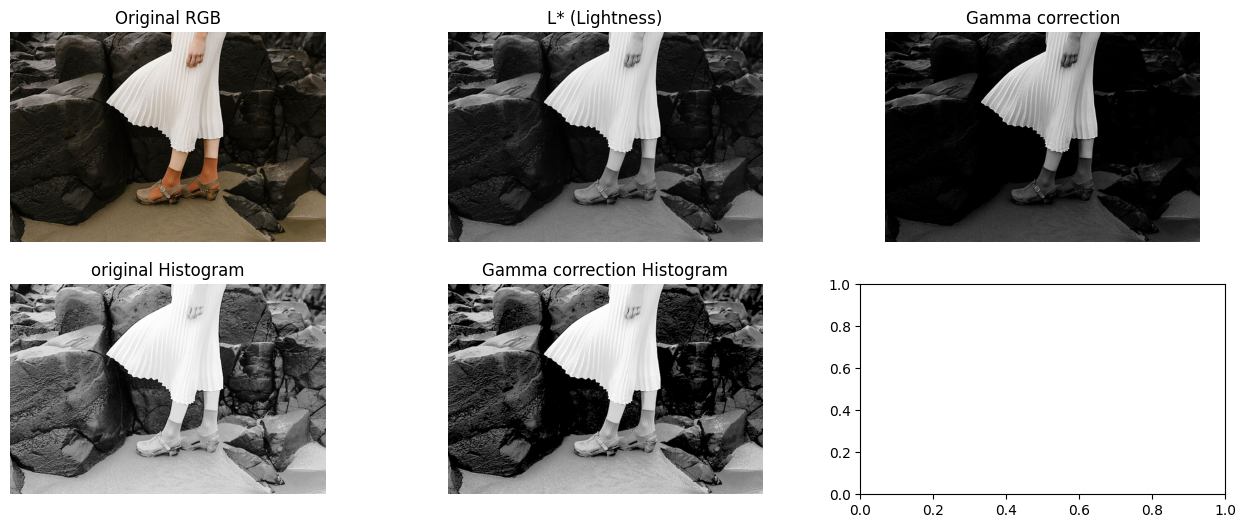

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv.imread("highlights_and_shadows.jpg")   # replace with your image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR → RGB for display

# Convert to LAB
lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
L, a, b = cv.split(lab)

gamma = 2
t = np.array([((i / 255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)
g = t[L]

g_histo = cv.equalizeHist(g)
ori_histo = cv.equalizeHist(L)
# Plot original and LAB planes
fig, axes = plt.subplots(2, 3, figsize=(16, 6))

axes[0,0].imshow(img)
axes[0,0].set_title("Original RGB")
axes[0,0].axis("off")

axes[0,1].imshow(L, cmap="gray")
axes[0,1].set_title("L* (Lightness)")
axes[0,1].axis("off")

axes[0,2].imshow(g, cmap="gray")
axes[0,2].set_title("Gamma correction")
axes[0,2].axis("off")

axes[1,0].imshow(ori_histo, cmap="gray")
axes[1,0].set_title("original Histogram")
axes[1,0].axis("off")

axes[1,1].imshow(g_histo, cmap="gray")
axes[1,1].set_title("Gamma correction Histogram")
axes[1,1].axis("off")

plt.show()
